# Comparison of different Classification Algorithms



In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

from main import normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

In [2]:
importer = DatasetImporter('data/testset.csv')
X = importer.data
y = importer.target
X = normalize_data(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=1337)

X[:5]

,file_count,avg_entropy,png_count,source_code_file_ratio,file_folder_ratio,up_to_dateness,hw_terminology_file_or_dir_names,hw_in_description_or_title,repo_size,md_count,...,avg_folder_depth,forks_count,hw_terminology_commits,edu_mail_ratio,is_io_page,doc_terms_in_readme,intro_or_course_in_description_or_title,open_issue_count,watcher_count,html_count
0,0.536725,0.614573,0.007822,0.688798,0.358461,0.000012,0.000000,0.0,0.754886,0.187607,...,0.260950,0.568104,0.625261,0.005291,0.0,0.079104,0.0,0.636555,0.772251,0.0000
1,0.287825,0.602981,0.000000,0.736966,0.203083,0.044766,0.000000,0.0,0.369765,0.230062,...,0.201288,0.534389,0.000000,0.000000,0.0,0.000000,0.0,0.151468,0.752434,0.0000
2,0.599871,0.701683,0.113809,0.229449,0.297784,0.016599,0.000000,0.0,0.734425,0.290305,...,0.289988,0.000000,0.356451,0.011194,0.0,0.222073,0.0,0.000000,0.000000,0.0422
3,0.487819,0.605136,0.000000,0.561879,0.228334,0.009023,0.181315,0.0,0.373365,0.415712,...,0.793583,0.000000,0.000000,0.000000,0.0,0.347449,0.0,0.000000,0.000000,0.0000
4,0.491944,0.618334,0.074129,0.271185,0.263303,0.252077,0.000000,0.0,0.508359,0.217729,...,0.588078,0.000000,0.087206,0.024390,0.0,0.125377,0.0,0.000000,0.000000,0.0000


## Helper

In [3]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
def analyze_results(model):
    print('acc train:', model.score(X_train, y_train))
    print('acc test:', model.score(X_test, y_test))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)), np.unique(y_test))

In [5]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [6]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.37
acc test: 0.38513513513513514


## Logistic Regression

In [7]:
logreg = sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

acc train: 0.693333333333
acc test: 0.641891891892
Confusion matrix, without normalization
[[ 8  3  0  0  0  4  0]
 [ 0 52  0  0  0  4  1]
 [ 4  5  3  0  0  2  0]
 [ 0  4  0  7  2  1  0]
 [ 0  7  1  2  8  1  0]
 [ 1  6  1  0  1 17  0]
 [ 0  2  0  0  0  1  0]]


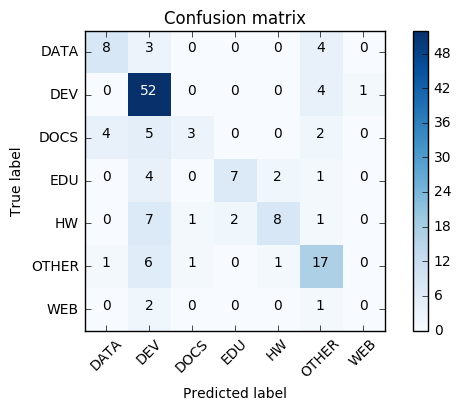

In [8]:
analyze_results(logreg)

## SVM

In [9]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(X_train, y_train)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)

acc train: 0.733333333333
acc test: 0.702702702703
Confusion matrix, without normalization
[[ 8  3  0  0  0  4  0]
 [ 0 52  1  0  0  4  0]
 [ 4  2  6  0  0  2  0]
 [ 0  4  0  8  1  1  0]
 [ 0  3  1  4 10  1  0]
 [ 1  3  1  1  0 20  0]
 [ 1  1  0  0  0  1  0]]


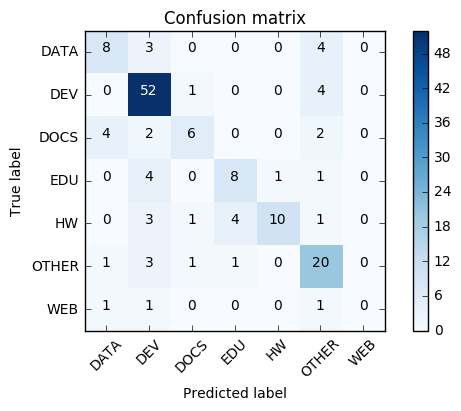

In [10]:
analyze_results(svm)

## DecisionTree

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

acc train: 0.993333333333
acc test: 0.527027027027
Confusion matrix, without normalization
[[ 5  2  4  1  3  0  0]
 [ 2 28  6  6  7  3  5]
 [ 4  1  6  0  2  1  0]
 [ 1  1  0 10  2  0  0]
 [ 2  0  0  3 12  1  1]
 [ 3  3  0  0  3 16  1]
 [ 1  1  0  0  0  0  1]]


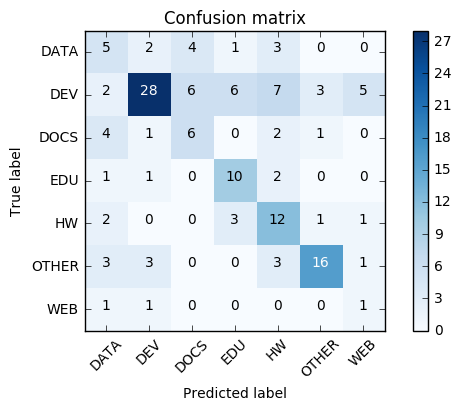

In [12]:
analyze_results(dtc)

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

acc train: 0.993333333333
acc test: 0.675675675676
Confusion matrix, without normalization
[[ 9  4  0  0  0  2  0]
 [ 0 48  2  0  2  4  1]
 [ 5  3  5  0  0  1  0]
 [ 1  2  0  9  1  1  0]
 [ 0  3  0  1 11  4  0]
 [ 1  5  1  1  0 18  0]
 [ 0  2  0  0  0  1  0]]


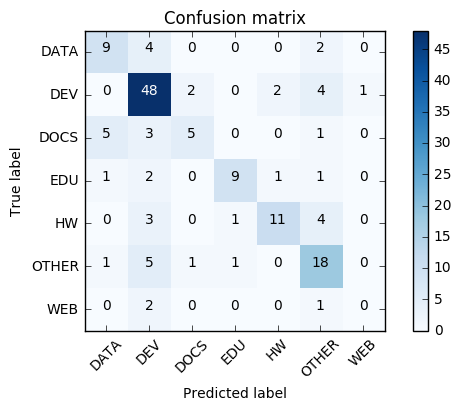

In [14]:
analyze_results(rf)

## NN

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1337,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

acc train: 0.876666666667
acc test: 0.668918918919
Confusion matrix, without normalization
[[11  2  0  1  0  1  0]
 [ 1 42  3  1  0  5  5]
 [ 6  2  5  0  0  0  1]
 [ 0  0  1 10  3  0  0]
 [ 0  4  0  2 11  2  0]
 [ 1  4  1  1  0 19  0]
 [ 0  1  0  0  0  1  1]]


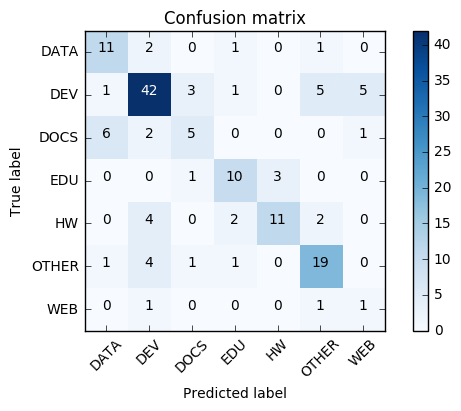

In [16]:
analyze_results(mlp)

## Two Step Stuff

In [17]:
from customClassifier.TwoStepClassifier import TwoStepClassifier
tsc = TwoStepClassifier(
    sklearn.neural_network.MLPClassifier(max_iter=20000, hidden_layer_sizes=(50,20), random_state=1337, shuffle=False, learning_rate='adaptive'),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(X_train, y_train)

acc train: 0.913333333333
acc test: 0.682432432432
Confusion matrix, without normalization
[[11  2  0  0  0  2  0]
 [ 2 40  3  1  4  3  4]
 [ 5  2  6  0  0  0  1]
 [ 1  0  0 10  2  1  0]
 [ 0  1  0  1 13  3  1]
 [ 1  3  1  1  0 20  0]
 [ 0  1  0  0  0  1  1]]


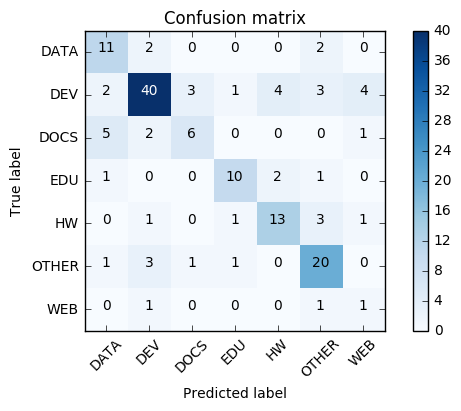

In [18]:
analyze_results(tsc)

# Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.15, random_state=1337)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1337,
              subsample=1.0, verbose=0, warm_start=False)

acc train: 0.993333333333
acc test: 0.655405405405
Confusion matrix, without normalization
[[ 7  5  1  0  1  1  0]
 [ 1 43  2  0  4  2  5]
 [ 4  2  7  0  0  0  1]
 [ 1  2  0 10  1  0  0]
 [ 0  2  1  4 11  1  0]
 [ 1  5  1  0  1 18  0]
 [ 0  2  0  0  0  0  1]]


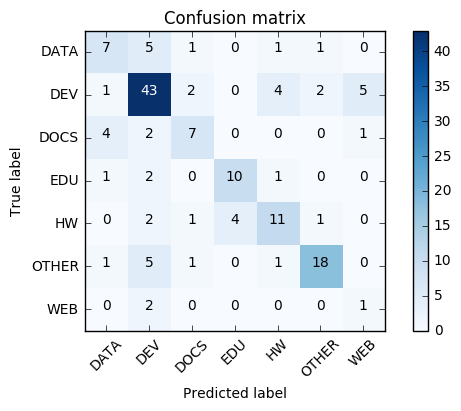

In [20]:
analyze_results(gbc)

## Voting Classifier

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

std_logreg = Pipeline([
    ('std', StandardScaler()),
    ('log_reg', LogisticRegression(C=1.0, max_iter=1000, solver='lbfgs', multi_class='ovr', random_state=1337))
])
vc = VotingClassifier([('log', std_logreg),
                       ('svc', SVC(C=20.0, random_state=1337)),
                      ('rf', RandomForestClassifier(n_estimators=100, random_state=1337)),
                      ('mlp', MLPClassifier(max_iter=20000, hidden_layer_sizes=(50, 20), random_state=1337, shuffle=False,
                                    learning_rate='adaptive')),
                      ('mlp2', MLPClassifier(max_iter=20000, hidden_layer_sizes=(100,), random_state=1337, shuffle=False, learning_rate='adaptive')),
                      ('gb', GradientBoostingClassifier(learning_rate=0.15, random_state=1337)),
                      ], n_jobs=1)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('log', Pipeline(steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_st...=100, presort='auto', random_state=1337,
              subsample=1.0, verbose=0, warm_start=False))],
         n_jobs=1, voting='hard', weights=None)

acc train: 0.886666666667
acc test: 0.702702702703
Confusion matrix, without normalization
[[11  2  0  0  0  2  0]
 [ 0 49  2  0  0  5  1]
 [ 5  2  6  0  0  0  1]
 [ 1  3  0  9  1  0  0]
 [ 0  5  0  2 11  1  0]
 [ 1  5  1  1  0 18  0]
 [ 0  2  0  0  0  1  0]]


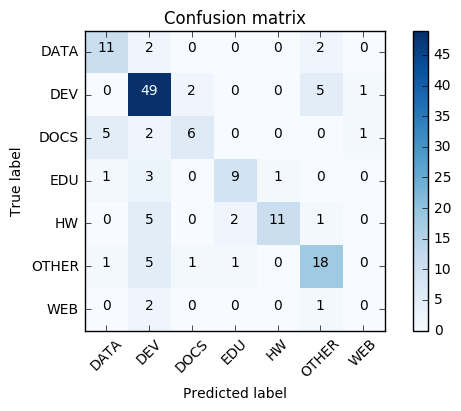

In [22]:
analyze_results(vc)

## Misclassified Repos

In [25]:
y_pred = vc.predict(X)
false_classification = np.logical_and(y_pred != y, y == 'DOCS')

pd.DataFrame({
    'repo': np.array(importer.repos)[false_classification],
    'true': y[false_classification],
    'predicted': y_pred[false_classification]
})

,predicted,repo,true
0,DATA,https://github.com/tbandixen/Data-Mining,DOCS
1,OTHER,https://github.com/haya14busa/ios-build,DOCS
2,DATA,https://github.com/cirosantilli/write-free-sci...,DOCS
3,DEV,https://github.com/wangwei0537/threadAndPackage,DOCS
4,DEV,https://github.com/yelhouari/20141019-Moolah-I...,DOCS
5,DEV,https://github.com/ppau/documents,DOCS
6,DEV,https://github.com/rjanardan/js-the-new-parts,DOCS
7,DATA,https://github.com/xabier/comunes-conocimiento...,DOCS
8,DATA,https://github.com/github/dmca,DOCS
9,DATA,https://github.com/WebAssembly/design,DOCS


## How the dataset size affects results

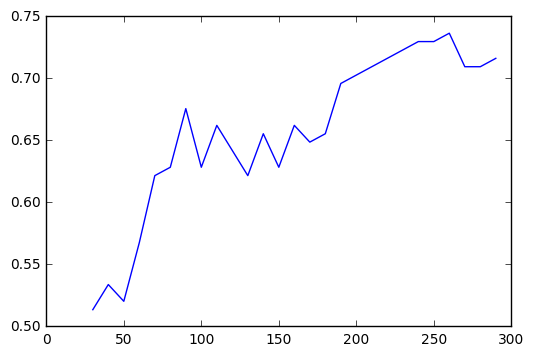

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(C=20.0, random_state=None)
svm = vc
accuracies = []
datasizes = []
for datasize in range(30, len(X_train), 10):
    datasizes.append(datasize)
    svm.fit(X_train[:datasize], y_train[:datasize])
    accuracies.append(svm.score(X_test, y_test))

plt.plot(datasizes, accuracies)